<a href="https://colab.research.google.com/github/eric-sun92/pytorch_custom_data/blob/main/04_pytorch_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
device, torch.__version__

('cpu', '2.0.1+cu118')

In [2]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} directory already exists, skipping download")
else:
  print(f" downloading...")
  image_path.mkdir(parents=True,
                   exist_ok=True)

with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  f.write(request.content)

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  zip_ref.extractall(image_path)

# make data path
# make image dir if doesn't exists alr
# with open(image.zip) as f, write to f
# with zipfile.Zipfile(image.zip) as f, zip_ref.extractall(image_dir)


 downloading...


In [3]:
import os

def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} folders and {len(filenames)} images in '{dirpath}'")

# os.walk(path)
# dirpath, folder_names, file_names

In [4]:
walk_through_dir(data_path)

There are 1 folders and 1 images in 'data'
There are 2 folders and 0 images in 'data/pizza_steak_sushi'
There are 3 folders and 0 images in 'data/pizza_steak_sushi/train'
There are 0 folders and 78 images in 'data/pizza_steak_sushi/train/pizza'
There are 0 folders and 75 images in 'data/pizza_steak_sushi/train/steak'
There are 0 folders and 72 images in 'data/pizza_steak_sushi/train/sushi'
There are 3 folders and 0 images in 'data/pizza_steak_sushi/test'
There are 0 folders and 25 images in 'data/pizza_steak_sushi/test/pizza'
There are 0 folders and 19 images in 'data/pizza_steak_sushi/test/steak'
There are 0 folders and 31 images in 'data/pizza_steak_sushi/test/sushi'


In [5]:
train_dir = image_path / "train"
test_dir = image_path / "test"

In [6]:
import random
from PIL import Image

# random.seed(42)

# 1. get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. get random image
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name
rand_image_class = random_image_path.parent.stem

# 4. open image
img = Image.open(random_image_path)

print(f"random image path: {random_image_path}")
print(f"random image class: {rand_image_class}")
print(f"Image height: {img.height}, image width: {img.width}")

# list(image_path.glob)
# random.choice()
# class = .parent.stem
# from PIL import Image
# Image.open(path)

random image path: data/pizza_steak_sushi/test/steak/1882831.jpg
random image class: steak
Image height: 512, image width: 306


(-0.5, 305.5, 511.5, -0.5)

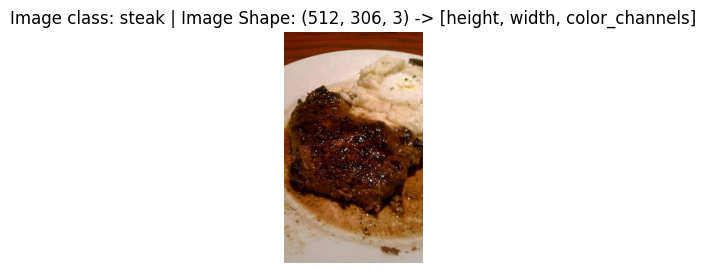

In [7]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)

plt.figure(figsize=(3, 3))
plt.imshow(img_as_array)
plt.title(f"Image class: {rand_image_class} | Image Shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)

# np.asarray(img)
# imshow(img_asArray)

In [8]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

In [9]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# from torchvision import transforms
# transforms.Compose(transforms.Resize, transforms.RandomHorizontalFlip, transforms.ToTensor())

In [10]:
data_transform(img).shape

torch.Size([3, 64, 64])

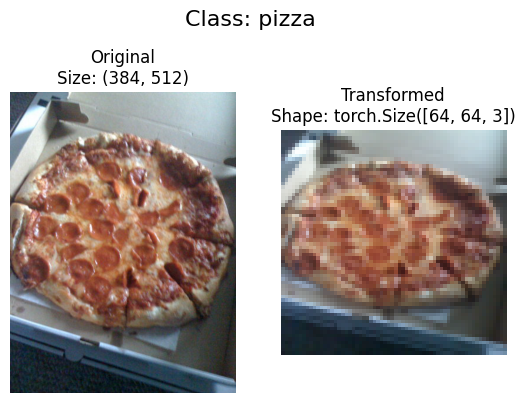

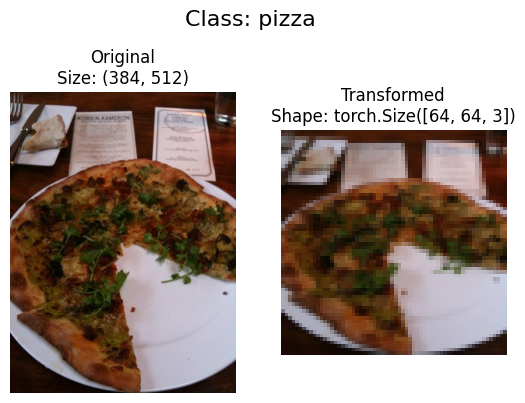

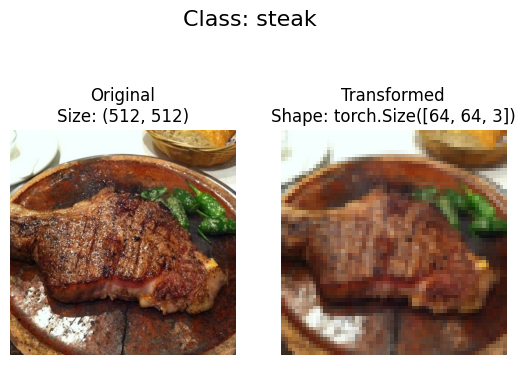

In [11]:
def plot_tranformed_images(image_paths: list, transform, n=3, seed=None):
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=3)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      transformed_image = transform(f).permute(1, 2, 0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_tranformed_images(image_paths=image_path_list, transform=data_transform,
                       n=3, seed=42)


In [12]:
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data, test_data

# from torchvision import datasets
# datasets.ImageFolder(root, transform, target_transform)


(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [13]:
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [14]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [15]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [16]:
len(train_data), len(test_data)

(225, 75)

In [17]:
img, label = train_data[0]
img, label

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0863],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0706],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0196,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

In [18]:
img_permute = img.permute(1,2,0)
img.shape, img_permute.shape

(torch.Size([3, 64, 64]), torch.Size([64, 64, 3]))

Text(0.5, 1.0, 'pizza')

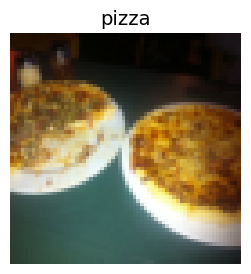

In [19]:
plt.figure(figsize=(5, 3))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)

In [20]:
import os
os.cpu_count()

2

In [21]:
from torch.utils.data import DataLoader

BATCH_SIZE=32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)


In [22]:
img, label = next(iter(train_dataloader))
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape} -> number of labels in 1 batch")

Image shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32]) -> number of labels in 1 batch


In [23]:
len(train_dataloader), len(train_data)

(8, 225)

In [24]:
# from a path file, load in the data (images) as tensors
# get classes names and class_to_idx dict

from typing import Tuple, Dict, List

def find_classes(target_dir) -> Tuple[List[str], Dict[str, int]]:
  classes = sorted([entry.name for entry in os.scandir(target_dir) if target_dir.is_dir()])

  if not classes:
    raise FileNotFoundError(f"could not find directory: {target_dir}")

  classes_dict = {class_name: idx for idx, class_name in enumerate(classes)}

  return classes, classes_dict

find_classes(target_dir=train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [25]:
from torch.utils.data import Dataset
import pathlib

class ImageFolderCustom(Dataset):
  def __init__(self, targ_dir: str, transform=None):
    self.paths = list(pathlib.Path(targ_dir).glob('*/*.jpg'))
    self.transforms = transform
    self.classes, self.class_to_idx = find_classes(targ_dir)

  def load_image(self, index: int) -> Image.Image:
    "Opens an image via a path and returns it"
    image_path = self.paths[index]
    return Image.open(image_path)

  def __len__(self):
    return len(self.paths)

  def __getitem__(self, index: int)-> Tuple[torch.Tensor, int]:
    "returns one sample of data, data and label (X, y)"
    img = self.load_image(index)
    label = self.class_to_idx[self.paths[index].parent.name]

    if self.transforms:
      return self.transforms(img), label
    else:
      return img, label



In [26]:
train_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [27]:
train_data_custom = ImageFolderCustom(train_dir, train_transform)
test_data_custom = ImageFolderCustom(test_dir, test_transform)

In [28]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7f76d3033880>,
 <__main__.ImageFolderCustom at 0x7f76d3033610>)

In [29]:
len(train_data), len(train_data_custom)

(225, 225)

In [30]:
train_data_custom.classes, train_data_custom.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [31]:

def plot_random_images(dataset: torch.utils.data.Dataset,
                       classes: List[str]=None,
                       n: int=10,
                       display_shape: bool = True,
                       seed: int = None):
  if seed:
    random.seed(seed)

  if n > 10:
    n = 10
    display_shape = False

  rand_sample_indexes = random.sample(range(len(dataset)), k=n)

  fig = plt.figure(figsize=(16, 8))
  for i, rand_sample_index in enumerate(rand_sample_indexes):
    img, label = dataset[rand_sample_index]
    img = img.permute(1, 2, 0)

    fig.add_subplot(1, n, i + 1)
    plt.imshow(img)
    plt.axis("off")
    if classes:
      title = f"Class: {classes[label]}"
      if display_shape:
        title = title + f"\nshape: {img.shape}"
    plt.title(title)


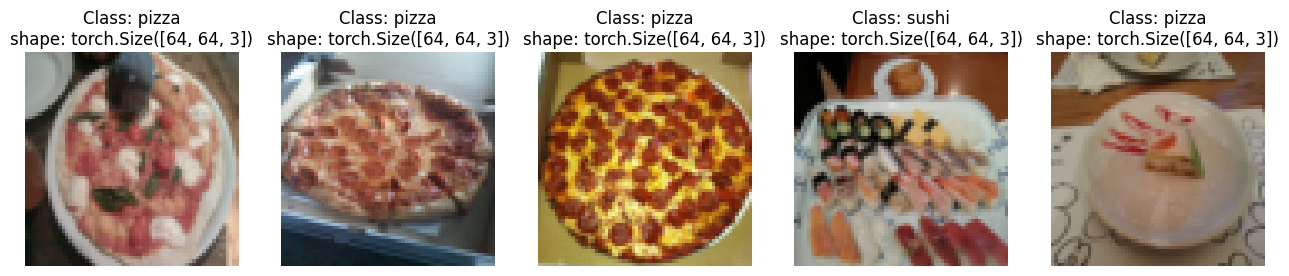

In [32]:
plot_random_images(train_data_custom,
                   train_data.classes,
                   5,
                   True,
                   None)

In [33]:
train_custom_dataloader = DataLoader(train_data_custom,
                                     BATCH_SIZE,
                                     True,
                                     num_workers=os.cpu_count())

test_custom_dataloader = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=os.cpu_count())


In [34]:
img, label = next(iter(train_custom_dataloader))
img.shape, label

(torch.Size([32, 3, 64, 64]),
 tensor([1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 2, 1, 0, 1, 2, 2, 1, 1, 1, 1, 0, 2, 2,
         0, 2, 0, 2, 1, 2, 0, 2]))

In [35]:
train_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])

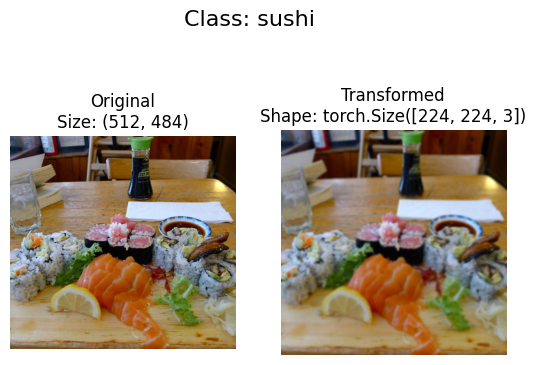

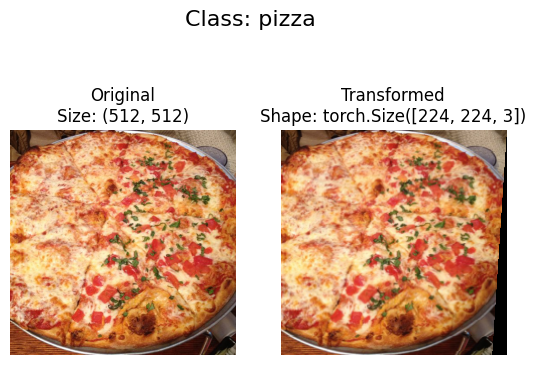

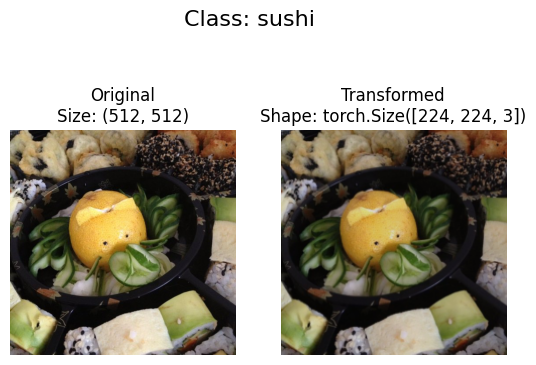

In [36]:
image_paths = list(image_path.glob("*/*/*.jpg"))
plot_tranformed_images(image_paths, train_transform, 3)

In [37]:
from torchvision import transforms

simple_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

from torchvision import datasets

simple_train_data = datasets.ImageFolder(
    root=train_dir,
    transform=simple_transform
)

simple_test_data = datasets.ImageFolder(
    root=test_dir,
    transform=simple_transform
)

from torch.utils.data import DataLoader
import os

simple_train_dataloader = DataLoader(
    dataset=simple_train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=os.cpu_count()
)

simple_test_dataloader = DataLoader(
    dataset=simple_test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=os.cpu_count()
)

In [119]:

import torch
from torch import nn

class TinyVGG(nn.Module):
  def __init__(self,
               in_features: int,
               hidden_units: int,
               out_features: int) -> None:
    super().__init__()
    self.conv_block1 = nn.Sequential(
        nn.Conv2d(in_channels=in_features,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    # self.conv_block3 = nn.Sequential(
    #     nn.Conv2d(in_channels=hidden_units,
    #               out_channels=hidden_units,
    #               kernel_size=3,
    #               stride=1,
    #               padding=0),
    #     nn.ReLU(),
    #     nn.Conv2d(in_channels=hidden_units,
    #               out_channels=hidden_units,
    #               kernel_size=3,
    #               stride=1,
    #               padding=0),
    #     nn.ReLU(),
    #     nn.MaxPool2d(kernel_size=2,
    #                  stride=2)
    # )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= 13 * 13 * hidden_units,
                  out_features=out_features)
    )


  def forward(self, x):
    x = self.conv_block1(x)
    x = self.conv_block2(x)
    # x = self.conv_block3(x)
    x = self.classifier(x)
    return x

In [164]:
torch.manual_seed(42)
model_0 = TinyVGG(in_features=3,
                  hidden_units=16,
                  out_features=len(class_names)).to(device)
model_0 = model_0.to(device)
model_0

TinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2704, out_features=3, bias=True)
  )
)

In [165]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 16, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 16, 62, 62]           448
│    └─ReLU: 2-2                         [1, 16, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 16, 60, 60]           2,320
│    └─ReLU: 2-4                         [1, 16, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 16, 30, 30]           --
├─Sequential: 1-2                        [1, 16, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 16, 28, 28]           2,320
│    └─ReLU: 2-7                         [1, 16, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 16, 26, 26]           2,320
│    └─ReLU: 2-9                         [1, 16, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 16, 13, 13]           --
├─Seq

In [166]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                            lr=0.001)
try:
  from torchmetrics import Accuracy
except:
  !pip install torchmetrics
  from torchmetrics import Accuracy


acc_fn = Accuracy(task="multiclass", num_classes=len(class_names))
epochs = 5


In [167]:
img_batch, label = next(iter(simple_train_dataloader))
img_batch.shape
model_0.train()
with torch.inference_mode():
  y_logits = model_0(img)
  y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

print(label, y_preds)
print(acc_fn(y_preds, label))


tensor([1, 2, 0, 0, 2, 1, 0, 1, 2, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
        2, 2, 1, 0, 1, 2, 2, 2]) tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])
tensor(0.4375)


In [168]:
# train step

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               acc_fn,
               optimizer: torch.optim.Optimizer,
               device=device):
  model.train()
  train_loss, train_acc = 0, 0

  for batch_num, batch in enumerate(dataloader):
    images, labels = batch
    images = images.to(device)
    labels = labels.to(device)

    y_logits = model(images)

    y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

    loss = loss_fn(y_logits, labels)

    train_loss += loss.item()
    train_acc += acc_fn(y_preds, labels).item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  return train_loss, train_acc


In [169]:
# test step

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              acc_fn,
              device=device):
  model.eval()
  with torch.inference_mode():
    test_loss, test_acc = 0, 0

    for batch_num, batch in enumerate(dataloader):
      images, labels = batch
      images = images.to(device)
      labels = labels.to(device)

      y_logits = model(images)

      y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

      loss = loss_fn(y_logits, labels)

      test_loss += loss.item()
      test_acc += acc_fn(y_preds, labels).item()

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

  return test_loss, test_acc


In [176]:
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          acc_fn,
          optimizer: torch.optim.Optimizer,
          epochs: int = 25,
          device=device):
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       acc_fn=acc_fn,
                                       optimizer=optimizer,
                                       device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    acc_fn=acc_fn,
                                    device=device)
    # print out whats happening
    print(f"Epoch: {epoch}, train_loss: {train_loss:.4f}, train_acc: {train_acc:.2f} | test_loss: {test_loss:.4f}, test_acc: {test_acc:.2f}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results



In [177]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

start_time = timer()
model_0_results = train(model=model_0,
                        train_dataloader=simple_train_dataloader,
                        test_dataloader=simple_test_dataloader,
                        loss_fn=loss_fn,
                        acc_fn=acc_fn,
                        optimizer=optimizer,
                        device=device)
end_time = timer()
total_time = end_time - start_time
print(f"total time: {total_time:.2f}")


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.7933, train_acc: 0.70 | test_loss: 0.9799, test_acc: 0.48
Epoch: 1, train_loss: 0.8019, train_acc: 0.71 | test_loss: 0.9766, test_acc: 0.39
Epoch: 2, train_loss: 0.8637, train_acc: 0.55 | test_loss: 1.0170, test_acc: 0.37
Epoch: 3, train_loss: 0.6931, train_acc: 0.71 | test_loss: 1.0059, test_acc: 0.50
Epoch: 4, train_loss: 0.7068, train_acc: 0.71 | test_loss: 1.0155, test_acc: 0.41
Epoch: 5, train_loss: 0.7553, train_acc: 0.72 | test_loss: 1.0163, test_acc: 0.42
Epoch: 6, train_loss: 1.0841, train_acc: 0.59 | test_loss: 1.0311, test_acc: 0.52
Epoch: 7, train_loss: 0.7524, train_acc: 0.76 | test_loss: 1.0568, test_acc: 0.42
Epoch: 8, train_loss: 0.7794, train_acc: 0.62 | test_loss: 1.0377, test_acc: 0.44
Epoch: 9, train_loss: 0.9094, train_acc: 0.58 | test_loss: 1.0631, test_acc: 0.42
Epoch: 10, train_loss: 1.0238, train_acc: 0.60 | test_loss: 1.1106, test_acc: 0.40
Epoch: 11, train_loss: 0.7778, train_acc: 0.64 | test_loss: 1.1454, test_acc: 0.32
Epoch: 12, tra

In [178]:
model_0_results

{'train_loss': [0.7933013029396534,
  0.801890067756176,
  0.8637215197086334,
  0.6931134294718504,
  0.7068410515785217,
  0.7552721947431564,
  1.0841375589370728,
  0.7523707523941994,
  0.7793849781155586,
  0.9093848764896393,
  1.0238130912184715,
  0.7778363786637783,
  0.925903670489788,
  0.7956250905990601,
  0.8605664595961571,
  0.7893233895301819,
  0.6824154537171125,
  0.6656017228960991,
  0.6488178931176662,
  0.6372169405221939,
  0.6333341374993324,
  0.5821331003680825,
  0.7092258185148239,
  0.5396878068568185,
  0.5722283907234669],
 'train_acc': [0.703125,
  0.7109375,
  0.546875,
  0.70703125,
  0.71484375,
  0.72265625,
  0.58984375,
  0.7578125,
  0.6171875,
  0.58203125,
  0.59765625,
  0.64453125,
  0.484375,
  0.7265625,
  0.625,
  0.5546875,
  0.69921875,
  0.75390625,
  0.73828125,
  0.78125,
  0.74609375,
  0.76171875,
  0.671875,
  0.796875,
  0.8125],
 'test_loss': [0.9798652331034342,
  0.976574718952179,
  1.0169799327850342,
  1.0059054493904114,


In [179]:
model_0_results.keys()
loss = model_0_results["train_loss"]
loss

[0.7933013029396534,
 0.801890067756176,
 0.8637215197086334,
 0.6931134294718504,
 0.7068410515785217,
 0.7552721947431564,
 1.0841375589370728,
 0.7523707523941994,
 0.7793849781155586,
 0.9093848764896393,
 1.0238130912184715,
 0.7778363786637783,
 0.925903670489788,
 0.7956250905990601,
 0.8605664595961571,
 0.7893233895301819,
 0.6824154537171125,
 0.6656017228960991,
 0.6488178931176662,
 0.6372169405221939,
 0.6333341374993324,
 0.5821331003680825,
 0.7092258185148239,
 0.5396878068568185,
 0.5722283907234669]

In [180]:
def plot_loss_curves(results: Dict[str, List[float]]):
  """Plots training (loss) curves of a results dictionary
  """
  # Get loss values of the results dictionary (training and test)
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  # Get acc values of the results dictionary (training and test)
  acc = results["train_acc"]
  test_acc = results["test_acc"]

  epochs = range(len(results["train_loss"]))

  # Set up a plot
  plt.figure(figsize=(15, 7))

  # plot loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(epochs, acc, label="train_acc")
  plt.plot(epochs, test_acc, label="test_acc")
  plt.title("acc")
  plt.xlabel("epochs")
  plt.legend()



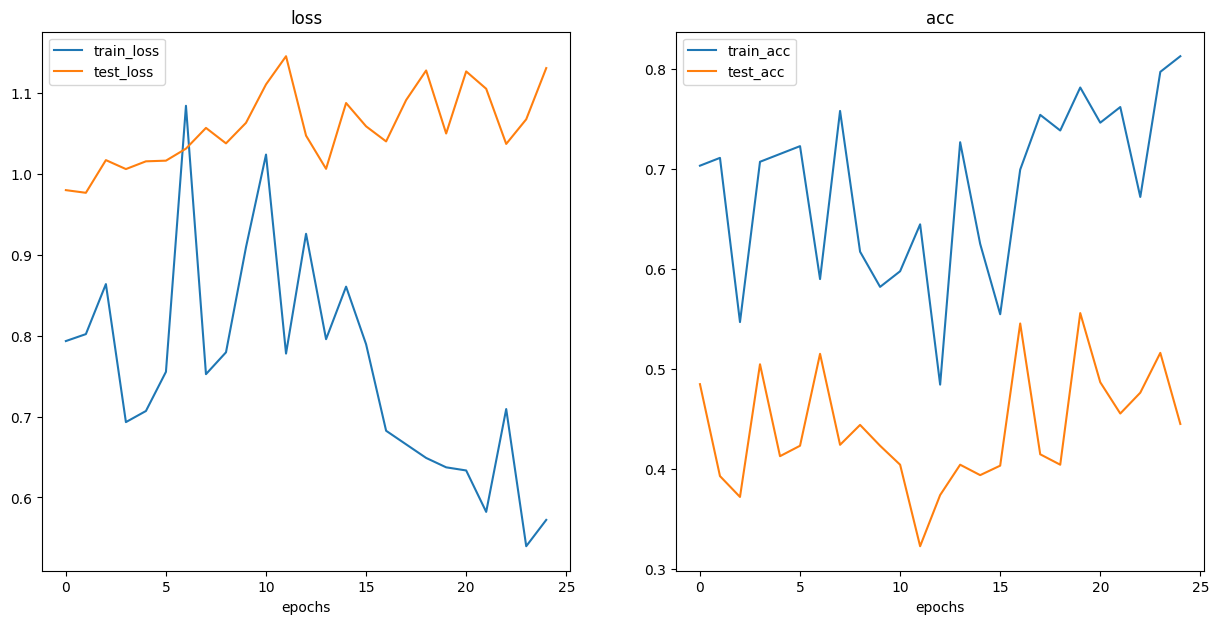

In [181]:
plot_loss_curves(results=model_0_results)

In [183]:
# overfitting - the test loss is much higher than the train loss
# try new model with data augmentation

In [184]:
from torchvision import transforms

train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform_simple = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [186]:
# create train and test datasets and dataloaders with data augmentation
from torchvision import datasets
from torch.utils.data import DataLoader
import os

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=train_transform_trivial)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=test_transform_simple)

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True,
                              num_workers=os.cpu_count())

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=32,
                              shuffle=False,
                              num_workers=os.cpu_count())


In [188]:
model_1 = TinyVGG(in_features=3,
                  hidden_units=10,
                  out_features=len(class_names))
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)

model_1_results=train(model=model_1,
      train_dataloader=train_dataloader,
      test_dataloader=test_dataloader,
      loss_fn=loss_fn,
      acc_fn=acc_fn,
      optimizer=optimizer,
      device=device
      )

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 0, train_loss: 1.1015, train_acc: 0.28 | test_loss: 1.1196, test_acc: 0.28
Epoch: 1, train_loss: 1.0829, train_acc: 0.44 | test_loss: 1.0977, test_acc: 0.26
Epoch: 2, train_loss: 1.1184, train_acc: 0.30 | test_loss: 1.1257, test_acc: 0.26
Epoch: 3, train_loss: 1.0960, train_acc: 0.30 | test_loss: 1.0936, test_acc: 0.27
Epoch: 4, train_loss: 1.0854, train_acc: 0.47 | test_loss: 1.1027, test_acc: 0.22
Epoch: 5, train_loss: 1.0884, train_acc: 0.32 | test_loss: 1.0692, test_acc: 0.61
Epoch: 6, train_loss: 1.0953, train_acc: 0.36 | test_loss: 0.9948, test_acc: 0.58
Epoch: 7, train_loss: 1.0415, train_acc: 0.45 | test_loss: 1.0724, test_acc: 0.29
Epoch: 8, train_loss: 1.0175, train_acc: 0.50 | test_loss: 1.1503, test_acc: 0.31
Epoch: 9, train_loss: 1.0820, train_acc: 0.39 | test_loss: 1.0604, test_acc: 0.35
Epoch: 10, train_loss: 1.0489, train_acc: 0.38 | test_loss: 1.0641, test_acc: 0.29
Epoch: 11, train_loss: 0.9591, train_acc: 0.57 | test_loss: 1.0319, test_acc: 0.32
Epoch: 12, tra

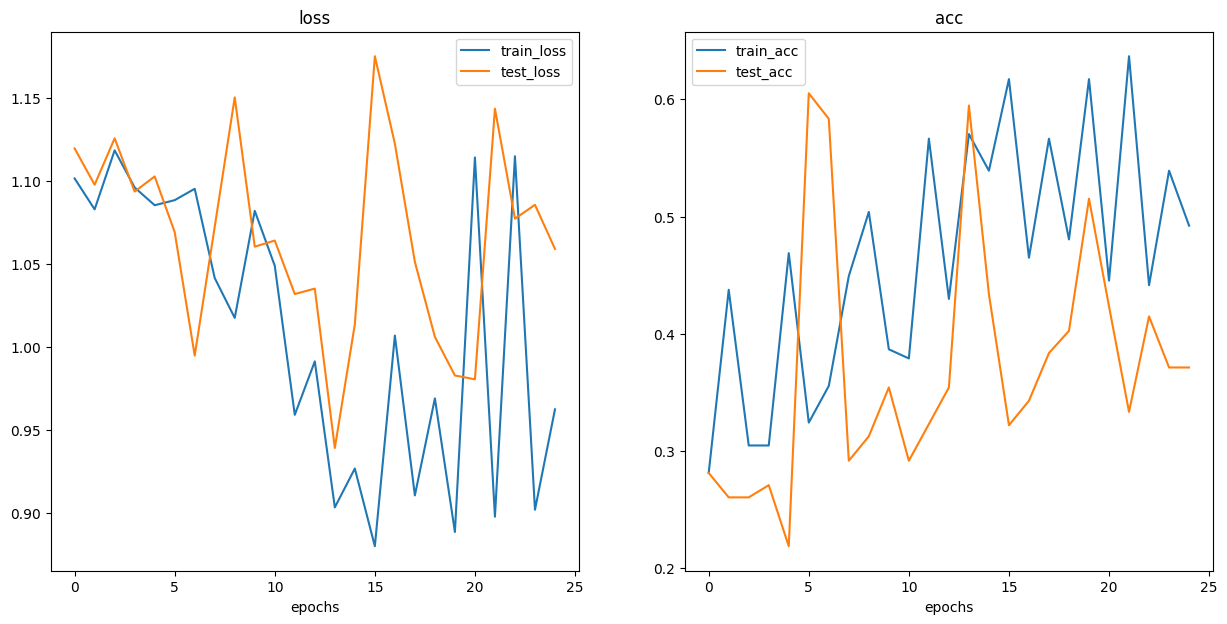

In [189]:
plot_loss_curves(model_1_results)

In [192]:
import pandas as pd
model_0_df = pd.DataFrame(data=model_0_results)
model_1_df = pd.DataFrame(data=model_1_results)


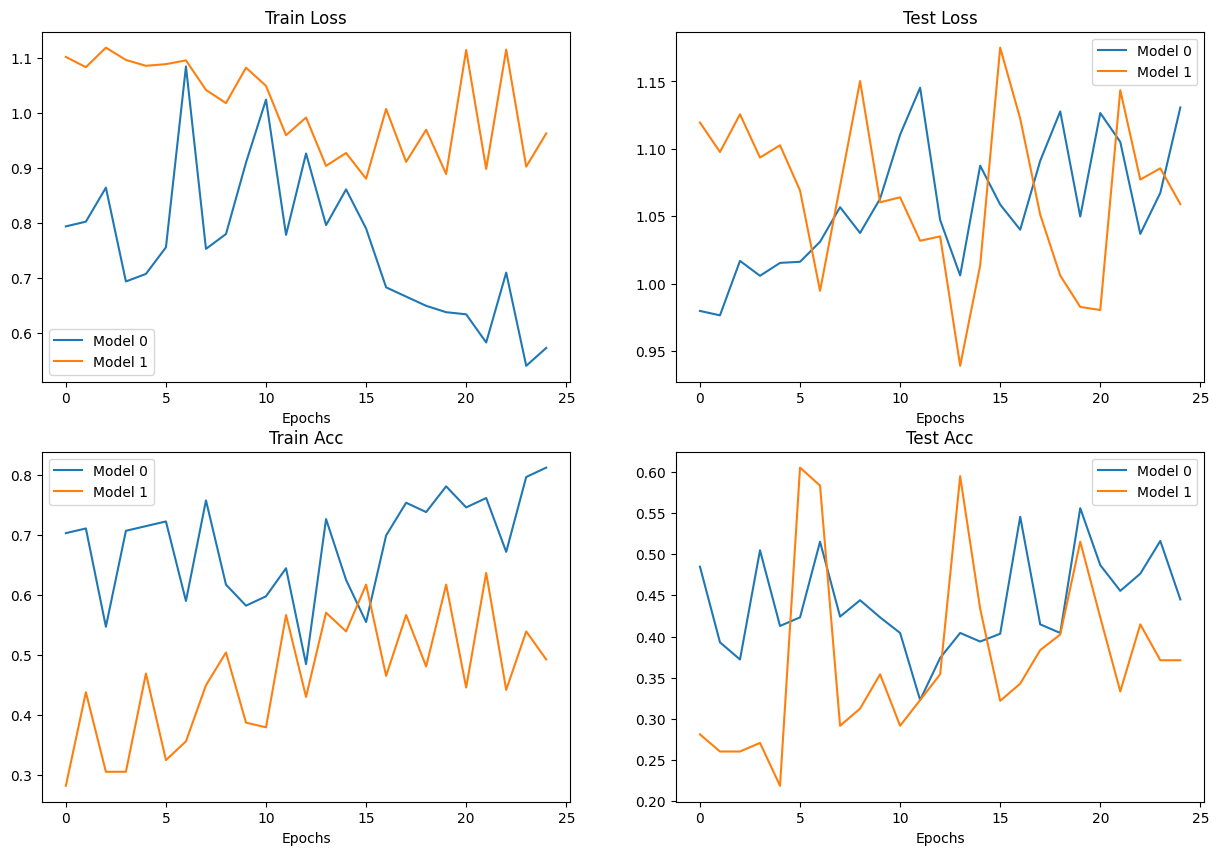

In [197]:
plt.figure(figsize=(15, 10))

epochs = range(len(model_0_df))

plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_results["train_loss"], label="Model 0")
plt.plot(epochs, model_1_results["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_results["test_loss"], label="Model 0")
plt.plot(epochs, model_1_results["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_results["train_acc"], label="Model 0")
plt.plot(epochs, model_1_results["train_acc"], label="Model 1")
plt.title("Train Acc")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_results["test_acc"], label="Model 0")
plt.plot(epochs, model_1_results["test_acc"], label="Model 1")
plt.title("Test Acc")
plt.xlabel("Epochs")
plt.legend()

In [198]:
# download custom image

import requests

custom_image_path = data_path / "04-pizza-dad.jpg"

if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
    f.write(request.content)
else:
  print(f'image alr downlaoded')

In [213]:
# load in custom image with pytorch

# tensor form with datatype (torch.float32)
# of shape 64 * 64
# on right device

import torchvision

custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float) / 255
custom_image.shape

torch.Size([3, 4032, 3024])

In [214]:
custom_image

tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

In [216]:
custom_image_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
])

transformed_custom_image = custom_image_transform(custom_image)
transformed_custom_image

tensor([[[0.4270, 0.9475, 0.9422,  ..., 0.1284, 0.0828, 0.0868],
         [0.4529, 0.4466, 0.5539,  ..., 0.0358, 0.1034, 0.1304],
         [0.3221, 0.2667, 0.2691,  ..., 0.0363, 0.0387, 0.0941],
         ...,
         [0.3794, 0.2809, 0.2549,  ..., 0.4544, 0.3235, 0.3853],
         [0.2843, 0.2603, 0.2529,  ..., 0.4681, 0.4196, 0.3539],
         [0.2534, 0.2814, 0.2863,  ..., 0.4397, 0.7020, 0.6319]],

        [[0.4784, 0.9647, 0.9461,  ..., 0.1598, 0.0946, 0.0985],
         [0.5118, 0.5250, 0.6000,  ..., 0.0510, 0.1152, 0.1578],
         [0.3574, 0.3059, 0.3108,  ..., 0.0480, 0.0466, 0.1069],
         ...,
         [0.2549, 0.1985, 0.1725,  ..., 0.3132, 0.1980, 0.2676],
         [0.1980, 0.1779, 0.1706,  ..., 0.3348, 0.3020, 0.2520],
         [0.1711, 0.1990, 0.1961,  ..., 0.3098, 0.4941, 0.4397]],

        [[0.5397, 0.9765, 0.9539,  ..., 0.1088, 0.0593, 0.0711],
         [0.3431, 0.3221, 0.5358,  ..., 0.0289, 0.0721, 0.1304],
         [0.2907, 0.2078, 0.1975,  ..., 0.0206, 0.0270, 0.

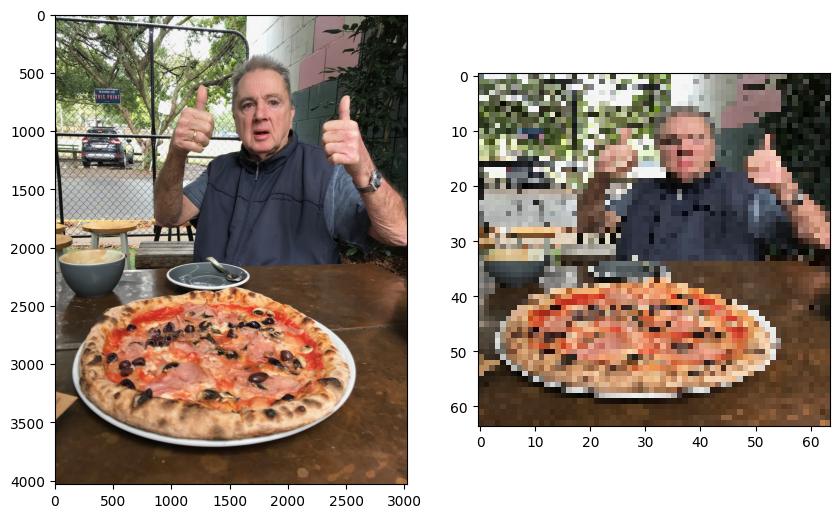

In [218]:
plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
plt.imshow(custom_image.permute(1, 2, 0))
plt.subplot(1, 2, 2)
plt.imshow(transformed_custom_image.permute(1, 2, 0))

In [225]:
transformed_custom_image=transformed_custom_image.unsqueeze(dim=0)
transformed_custom_image.shape

torch.Size([1, 3, 64, 64])

In [236]:
model_0.eval()
with torch.inference_mode():
  y_logit = model_0(transformed_custom_image.to(device))
  y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
custom_pred = y_pred.item()

In [238]:
class_names[custom_pred]
# correct prediction!

'pizza'

In [241]:
model_1.eval()
with torch.inference_mode():
  y_logit = model_1(transformed_custom_image.to(device))
  y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
custom_pred = y_pred.item()
class_names[custom_pred]
# wrong prediction :(

'steak'

In [268]:
def plot_pred_and_prob(model: nn.Module,
             image_path: str,
             class_names: List[str] = None,
             transform=None,
             device=device):
  image = torchvision.io.read_image(image_path).type(torch.float) / 255
  if transform:
    image = transform(image)
  image = image.unsqueeze(dim=0)
  model.eval()
  with torch.inference_mode():
    y_logit = model(image.to(device))
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)

  if class_names:
    class_name = class_names[y_pred]

  title = f"pred: {class_name} | prob: {y_logit.max():.3f}"
  plt.imshow(image.squeeze().permute(1, 2, 0))
  plt.title(title)
  plt.axis(False)

  return class_names[y_pred]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


'pizza'

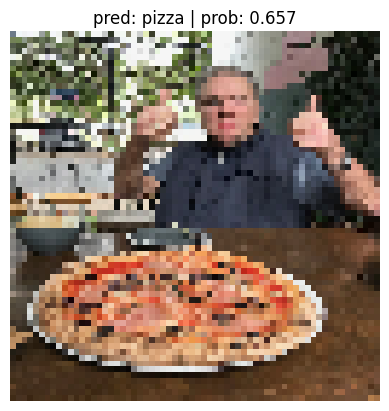

In [269]:
plot_pred_and_prob(model=model_0,
         image_path=str(custom_image_path),
         class_names=class_names,
         transform=custom_image_transform,
         device=device)

'steak'

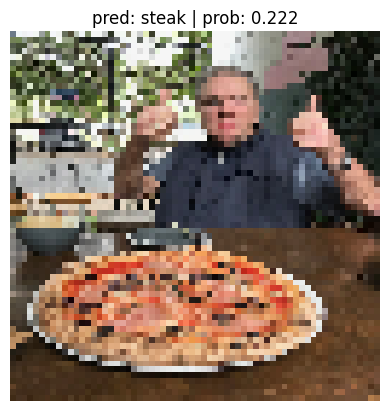

In [272]:
plot_pred_and_prob(model=model_1,
         image_path=str(custom_image_path),
         class_names=class_names,
         transform=custom_image_transform,
         device=device)